In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [63]:
born_usa = pd.read_csv("./born_usa.csv").dropna()
born_usa.describe()


,year,month,day,births
count,15067.000000,15067.000000,15067.000000,15067.000000
mean,1978.417402,6.516427,17.769894,4678.631513
std,5.762018,3.449554,15.284034,1003.104707
min,1969.000000,1.000000,1.000000,1.000000
25%,1973.000000,4.000000,8.000000,4344.000000
50%,1978.000000,7.000000,16.000000,4785.000000
75%,1983.000000,10.000000,24.000000,5247.000000
max,1988.000000,12.000000,99.000000,6527.000000


In [64]:
#fig = plt.figure(figsize=(11,8))
#fig = sns.boxplot(born_usa.births)

born_usa = born_usa.query('(births > 1000) & (births < 100000)')
born_usa.describe()


#fig = plt.figure(figsize=(11,8))
#fig = sns.boxplot(born_usa.births)

,year,month,day,births
count,14610.000000,14610.000000,14610.000000,14610.000000
mean,1978.501027,6.522930,15.729637,4824.470089
std,5.766538,3.448821,8.800393,579.996983
min,1969.000000,1.000000,1.000000,3249.000000
25%,1974.000000,4.000000,8.000000,4383.000000
50%,1979.000000,7.000000,16.000000,4812.000000
75%,1984.000000,10.000000,23.000000,5259.000000
max,1988.000000,12.000000,31.000000,6527.000000


In [68]:
for field in ["day", "month", "year"]:
    born_usa[field] = born_usa[field].astype(int)
    ####
born_usa["decade"] = 10*(born_usa.year//10)
born_usa.index = pd.to_datetime(10000 * born_usa.year + 100 * born_usa.month + born_usa.day, format='%Y%m%d')

born_usa.head(3)

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960


In [69]:
#row_date = pd.to_datetime(['day','month','year'], format="d%b%Y")
#print(row_date)

In [76]:
born_usa["dayOfWeek"] = born_usa.index.dayofweek
born_usa.head(3)

,year,month,day,gender,births,decade,dayOfWeek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3


In [81]:
births_per_day = born_usa.pivot_table('births', index='dayOfWeek',
                             columns='decade', aggfunc='sum')

In [82]:
births_per_day.head(10)

decade,1960,1970,1980
dayOfWeek,,,
0,526638,4895418,4949739
1,549754,5090433,5173612
2,537910,4949892,5045584
3,517742,4903588,5013476
4,531220,4992508,5069502
5,483710,4392927,4214867
6,451604,4154367,4041017


<Figure size 792x576 with 0 Axes>

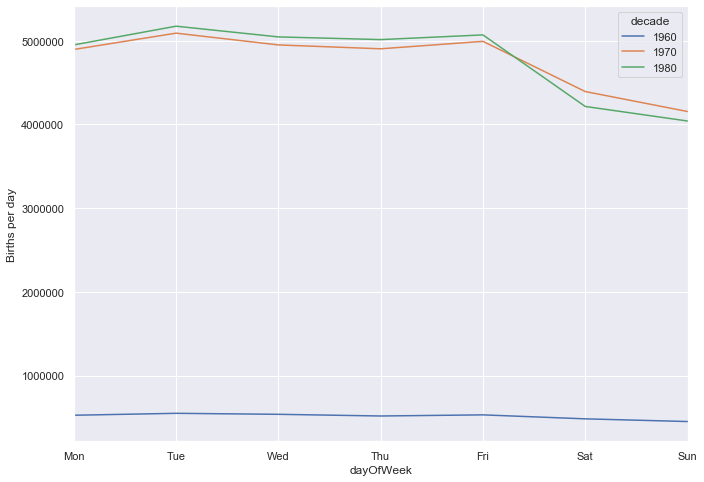

In [84]:
fig = plt.figure(figsize=(11,8))
births_per_day.plot(figsize=(11,8))
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Births per day');